In [12]:
import pandas as pd
import matplotlib.pyplot as plt

resnet_18 = pd.read_csv('../output_files/resnet/resnet18_metrics.csv')
resnet_50 = pd.read_csv('../output_files/resnet/resnet50_metrics.csv')
resnet_101 = pd.read_csv('../output_files/resnet/resnet101_metrics.csv')
vgg = pd.read_csv('../output_files/vgg/vgg_metrics.csv')
alexnet = pd.read_csv("../output_files/alexnet/alexnet_metrics.csv")
googlenet = pd.read_csv("../output_files/googlenet/googlenet_metrics.csv")

In [13]:
resnet_18 = resnet_18[["Accuracy", "Top-5 Accuracy"]]
resnet_50 = resnet_50[["Accuracy", "Top-5 Accuracy"]]
resnet_101 = resnet_101[["Accuracy", "Top-5 Accuracy"]]
vgg = vgg[["Accuracy", "Top-5 Accuracy"]]
alexnet = alexnet[["Accuracy", "Top-5 Accuracy"]]
googlenet = googlenet[["Accuracy", "Top-5 Accuracy"]]


In [16]:
alexnet_max = alexnet.loc[alexnet[['Accuracy', 'Top-5 Accuracy']].idxmax().values]
alexnet_max = alexnet_max.drop_duplicates()

resnet18_max = resnet_18.loc[resnet_18[['Accuracy', 'Top-5 Accuracy']].idxmax().values]
resnet18_max = resnet_18.loc[resnet_18[['Accuracy']].idxmax().values]

resnet50_max = resnet_50.loc[resnet_50[['Accuracy', 'Top-5 Accuracy']].idxmax().values]
resnet50_max = resnet_50.loc[resnet_50[['Accuracy']].idxmax().values]

resnet101_max = resnet_101.loc[resnet_101[['Accuracy', 'Top-5 Accuracy']].idxmax().values]
resnet101_max = resnet_101.loc[resnet_101[['Top-5 Accuracy']].idxmax().values]

vgg_max = vgg.loc[vgg[['Accuracy', 'Top-5 Accuracy']].idxmax().values]
vgg_max = vgg.loc[vgg[['Top-5 Accuracy']].idxmax().values]

googlenet_max = googlenet.loc[googlenet[["Accuracy", "Top-5 Accuracy"]].idxmax().values]
googlenet_max = googlenet.loc[googlenet[['Accuracy']].idxmax().values]


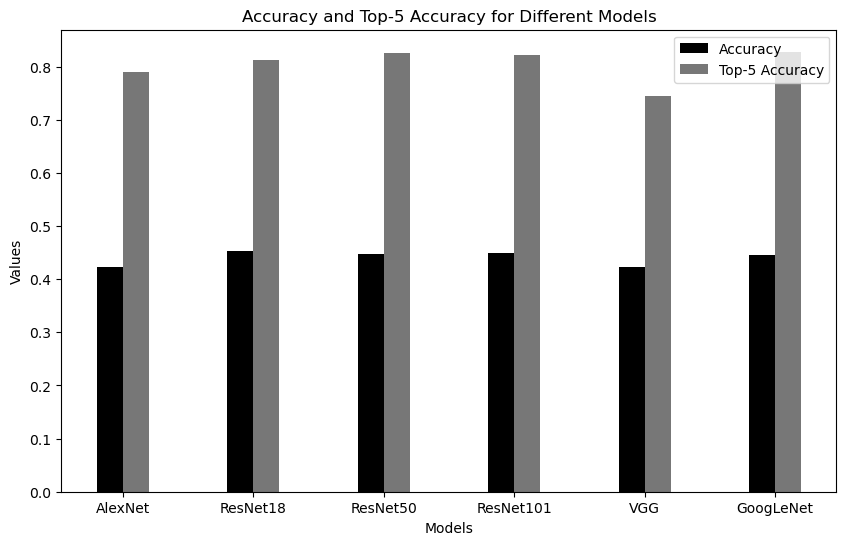

In [19]:
models = ['AlexNet', 'ResNet18', 'ResNet50', 'ResNet101', 'VGG', "GoogLeNet"]
accuracies = [
    alexnet_max['Accuracy'].values[0],
    resnet18_max['Accuracy'].values[0],
    resnet50_max['Accuracy'].values[0],
    resnet101_max['Accuracy'].values[0],
    vgg_max['Accuracy'].values[0],
    googlenet_max["Accuracy"].values[0]
]
top5_accuracies = [
    alexnet_max['Top-5 Accuracy'].values[0],
    resnet18_max['Top-5 Accuracy'].values[0],
    resnet50_max['Top-5 Accuracy'].values[0],
    resnet101_max['Top-5 Accuracy'].values[0],
    vgg_max['Top-5 Accuracy'].values[0],
    googlenet_max["Top-5 Accuracy"].values[0]
]

x = range(len(models))

plt.figure(figsize=(10, 6))

plt.bar(x, accuracies, width=0.4, color='#000000', label='Accuracy', align='center')
plt.bar(x, top5_accuracies, width=0.2, color='#777777', label='Top-5 Accuracy', align='edge')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Accuracy and Top-5 Accuracy for Different Models')
plt.xticks(x, models)
plt.legend()
plt.savefig("../output_files/model_barplot.jpg")
plt.show()


In [22]:
model_metrics = {
    'AlexNet': {
        'Training Loss': [2.0022, 1.9983, 1.9987, 1.9975, 1.9970, 1.9971, 1.9969, 1.9971, 1.9963, 1.9951, 1.9963, 1.9956, 1.9971, 1.9960],
        "Test Loss" : [2.0027],
        'Epochs': 14
    },
    'ResNet18': {
        'Training Loss': [1.8573, 1.8151, 1.7788, 1.7274, 1.6953, 1.6839, 1.6492, 1.6186, 1.5940],
        "Test Loss" : [1.8196],
        'Epochs': 10
    },
    'ResNet50': {
        'Training Loss': [1.9375, 1.8672, 1.8435, 1.8189, 1.8115, 1.7974, 1.7956, 1.7775, 1.7620, 1.7550, 1.7497, 1.7279, 1.7207, 1.7174, 1.7011, 1.6824, 1.6793],
        "Test Loss" : [1.8567],
        'Epochs': 17
    },
    'ResNet101': {
        'Training Loss': [1.9722, 1.8952, 1.8626, 1.8716, 1.8454, 1.8290, 1.8291, 1.8168, 1.8104, 1.7994, 1.7933, 1.7750, 1.7690, 1.7640, 1.7487, 1.7408, 1.7366, 1.7268, 1.7144],
        "Test Loss" : [1.8659],
        'Epochs': 19
    },
    'VGG': {
        'Training Loss': [1.7523, 1.6942, 1.6955, 1.6907, 1.6949, 1.6950, 1.6995, 1.6945, 1.6903, 1.6941, 1.6933],
        "Test Loss" : [2.4784],
        'Epochs': 12
    },
    'GoogLeNet': {
        'Training Loss': [1.8848, 1.8128, 1.7645, 1.7383, 1.7043, 1.6814, 1.6450],
        "Test Loss" : [1.9898],
        'Epochs': 7
    }
}


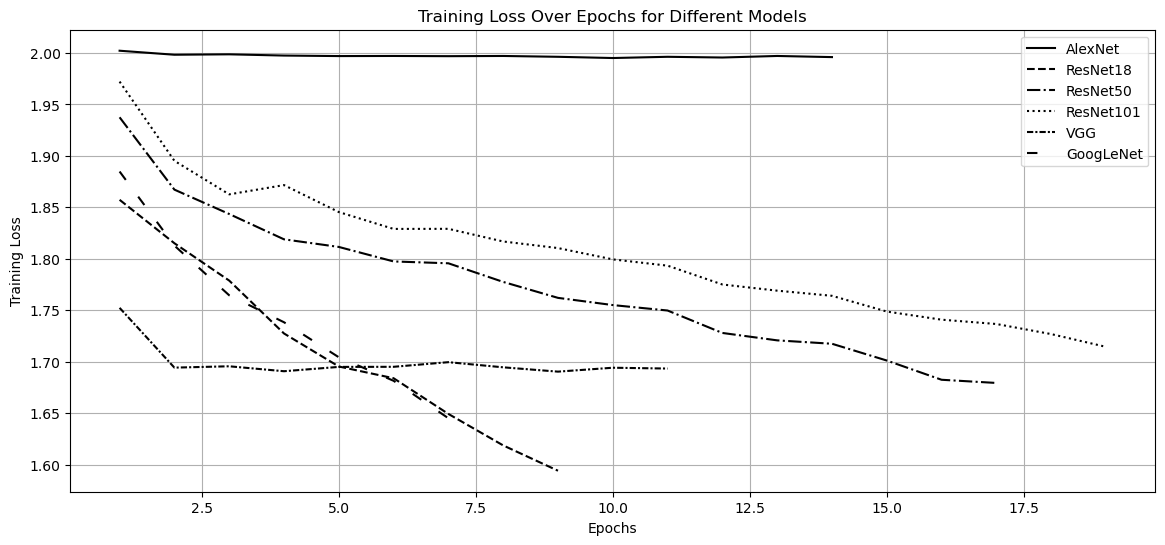

In [23]:
model_names = list(model_metrics.keys())

plt.figure(figsize=(14, 6))

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]

for i, model in enumerate(model_names):
    training_loss = model_metrics[model]['Training Loss']
    epochs = list(range(1, len(training_loss) + 1))
    plt.plot(epochs, training_loss, label=model, color='black', linestyle=line_styles[i % len(line_styles)])

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.savefig("../output_files/training_epoch.jpg")
plt.show()

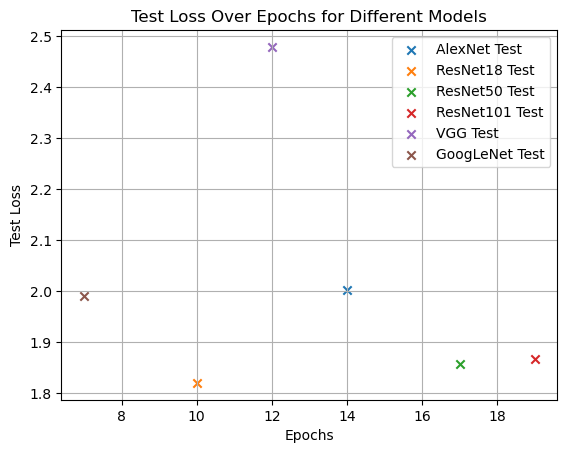

In [24]:
for i, model in enumerate(model_names):
    test_loss = model_metrics[model]['Test Loss']
    test_epoch = model_metrics[model]['Epochs']
    plt.scatter([test_epoch], test_loss, label=f'{model} Test', marker='x')

plt.legend()
plt.grid(True)
plt.title('Test Loss Over Epochs for Different Models')
plt.xlabel("Epochs")
plt.ylabel("Test Loss")
plt.savefig("../output_files/training_and_test_loss.jpg")
plt.show()